In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pandas as pd
import random
from sklearn.preprocessing import MinMaxScaler


sys.path.append(os.path.abspath('../src/'))
from ActivationFunctions import *
from NeuralNetwork import *
from MyUtils import *

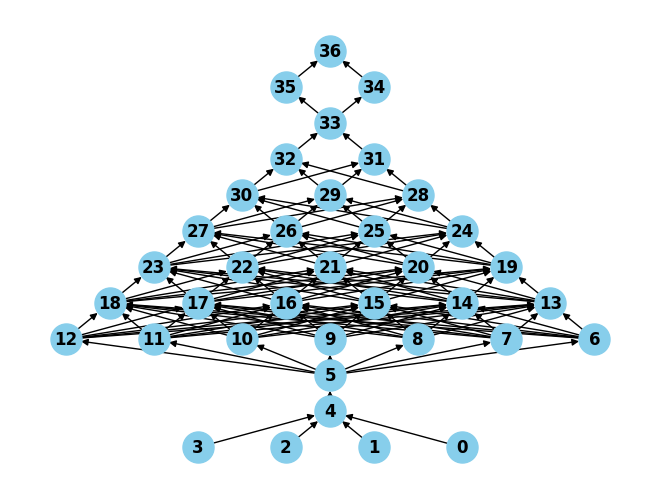

In [3]:
topology_complex = create_stratified_topology([4,1,1,7,6,5,4,3,2,1,2,1])
NeuralNetwork.display_topology(topology_complex)

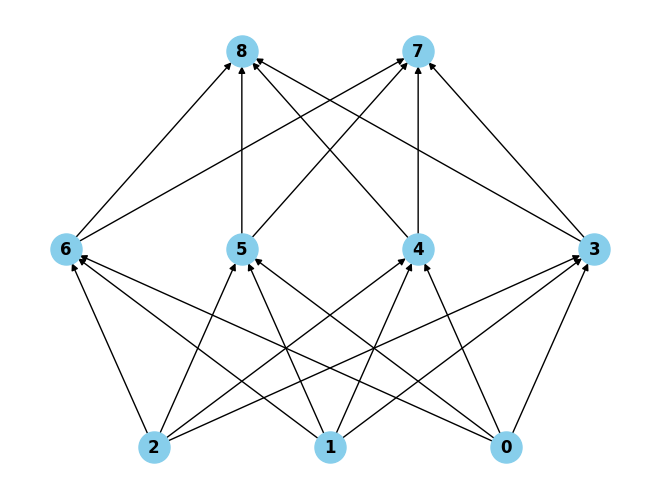

In [4]:
topology_1 = create_stratified_topology([3,4,2])
NeuralNetwork.display_topology(topology_1)

In [38]:
topology_1

{0: ['input', 'None', [], [3, 4, 5, 6]],
 1: ['input', 'None', [], [3, 4, 5, 6]],
 2: ['input', 'None', [], [3, 4, 5, 6]],
 3: ['hidden_0', 'sigmoid', [1], [7, 8]],
 4: ['hidden_0', 'sigmoid', [1], [7, 8]],
 5: ['hidden_0', 'sigmoid', [1], [7, 8]],
 6: ['hidden_0', 'sigmoid', [1], [7, 8]],
 7: ['output', 'identity', [], []],
 8: ['output', 'identity', [], []]}

In [39]:
NN = NeuralNetwork(topology_1, -0.75, 0.75, True, RANDOM_STATE)

In [40]:
tr_input = 3
tr_output = 2
len_dataset = 1000

f1 = lambda x : x[2]*2 + x[1]*3 - x[0] - 5
f2 = lambda x : x[2]*1.3 - x[1]**2 + x[0]*3 + 2.5

tr = create_dataset(len_dataset, tr_input, [0, 10], [f1, f2], RANDOM_STATE)
tr.sample(10, random_state=RANDOM_STATE)

,input_1,input_2,input_3,output_1,output_2
144,15.0,21.0,27.0,52.0,-335.9
833,42.0,17.0,4.0,-33.0,-132.8
270,96.0,7.0,33.0,-59.0,306.9
468,65.0,34.0,83.0,153.0,-828.1
962,80.0,17.0,8.0,-63.0,-13.6
186,50.0,63.0,17.0,123.0,-3771.9
942,35.0,77.0,7.0,160.0,-5789.9
516,12.0,80.0,52.0,282.0,-6271.4
286,61.0,47.0,15.0,60.0,-1981.5
458,60.0,83.0,96.0,331.0,-6559.2


In [41]:
scaler_out = MinMaxScaler()
scaler_in = MinMaxScaler()
scaler_in.fit(tr.values[:,:tr_input])
scaler_out.fit(tr.values[:,tr_input:])
tr_normalized = np.empty((len_dataset, tr_output+tr_input))
tr_normalized[:,:tr_input] = scaler_in.transform(tr.values[:,:tr_input])
tr_normalized[:,tr_input:] = scaler_out.transform(tr.values[:,tr_input:])

In [42]:
tr_normalized

array([[0.53535354, 0.93939394, 0.01010101, 0.54428044, 0.12279247],
       [0.38383838, 0.47474747, 0.24242424, 0.40221402, 0.75703103],
       [0.34343434, 0.72727273, 0.55555556, 0.66236162, 0.46614545],
       ...,
       [0.49494949, 0.53535354, 0.14141414, 0.37822878, 0.69977592],
       [0.03030303, 0.35353535, 0.81818182, 0.61070111, 0.85111697],
       [0.97979798, 0.        , 0.58585859, 0.15867159, 0.99692994]])

In [43]:
training_set = tr.values

batch_size = int(len_dataset/10)
max_epochs = 1000
error_decrease_tolerance = 0.000001
patience = 10

learning_rate = 0.01/batch_size
lambda_tikhonov = 0
alpha_momentum = 0

stats = NN.train_2(tr_normalized, batch_size, max_epochs, error_decrease_tolerance, patience, 
                   learning_rate, lambda_tikhonov, alpha_momentum)

In [44]:
tr

,input_1,input_2,input_3,output_1,output_2
0,53.0,93.0,1.0,178.0,-8463.7
1,38.0,47.0,24.0,101.0,-2038.8
2,34.0,72.0,55.0,242.0,-4985.5
3,20.0,47.0,15.0,101.0,-2104.5
4,55.0,33.0,71.0,136.0,-806.7
...,...,...,...,...,...
995,88.0,17.0,5.0,-77.0,6.5
996,35.0,36.0,98.0,219.0,-1038.6
997,49.0,53.0,14.0,88.0,-2618.8
998,3.0,35.0,81.0,214.0,-1085.7


In [45]:
predictions = scaler_out.inverse_transform(NN.predict_array(tr_normalized[:,:tr_input]))
predictions

array([[  165.47066156, -3284.64301717],
       [  139.77784162, -2797.56948468],
       [  154.94888508, -3085.12600398],
       ...,
       [  145.78663954, -2911.47869872],
       [  125.3141508 , -2523.28655655],
       [  130.89443361, -2629.03923734]])

In [46]:
for key in list(stats.keys())[:9]:
    print(key, ':', stats[key])

training_set_len : 1000
minibatch_size : 100
max_epochs : 1000
error_decrease_tolerance : 1e-06
patience : 10
learning_rate : 0.0001
lambda_tikhonov : 0
alpha_momentum : 0
epochs : 1000


In [47]:
stats['training_error']

[0.602919908214111,
 0.3706380743064052,
 0.25672673257842193,
 0.19433371492207493,
 0.16011096556599516,
 0.14130727893749587,
 0.13095738613963923,
 0.12525512716064793,
 0.12211909751139169,
 0.12040766740373644,
 0.11948806021965046,
 0.1190033678020335,
 0.11875031936387712,
 0.11861458724702961,
 0.11853417349602105,
 0.1184774358982318,
 0.1184298058674822,
 0.1183859211274169,
 0.11834503132857854,
 0.11830830868038864,
 0.11827727173747504,
 0.11825289609884189,
 0.11823518891467762,
 0.1182231223745539,
 0.11821487299864676,
 0.1182082794183591,
 0.11820135812619262,
 0.11819270162194755,
 0.11818165690151684,
 0.11816828529832066,
 0.11815317242511905,
 0.11813717382933812,
 0.11812116724661041,
 0.11810585809863033,
 0.11809166259759997,
 0.11807867506376848,
 0.1180667113842023,
 0.11805540753854575,
 0.11804434227947573,
 0.11803315031708601,
 0.11802159917384177,
 0.11800961702104097,
 0.11799727444410084,
 0.1179847346198195,
 0.11797219124231667,
 0.11795981222329692,

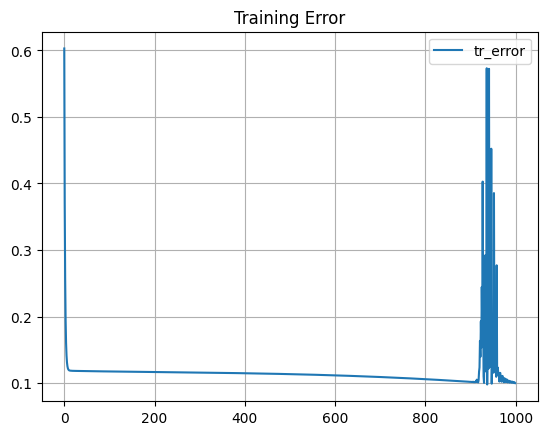

In [48]:
multy_plot([stats['training_error']], ['tr_error'], 'Training Error')

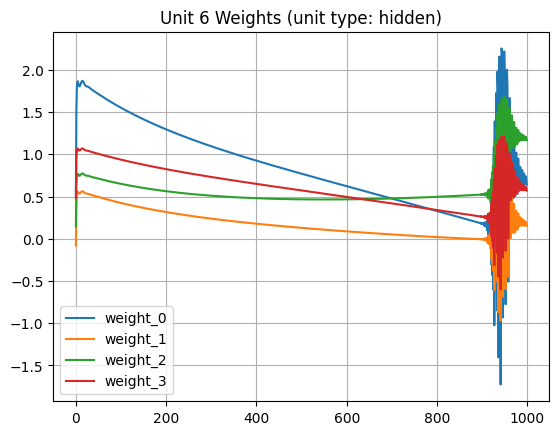

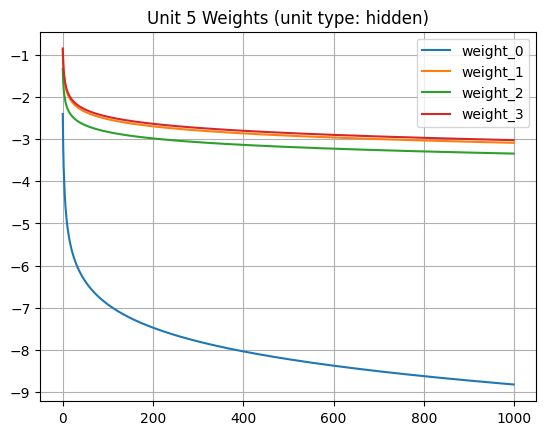

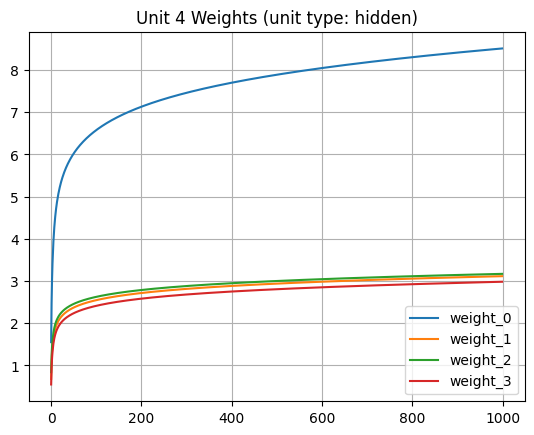

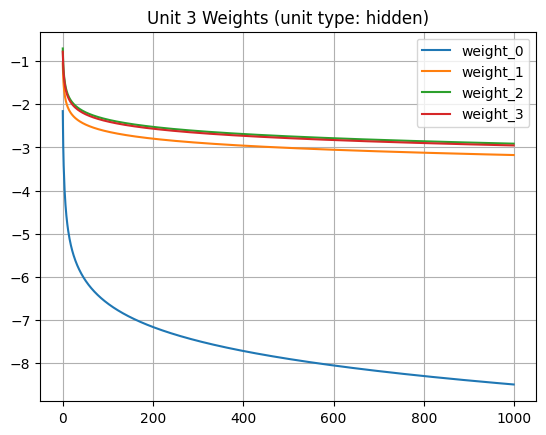

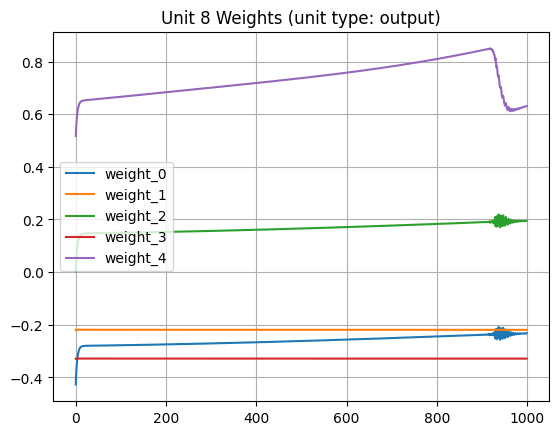

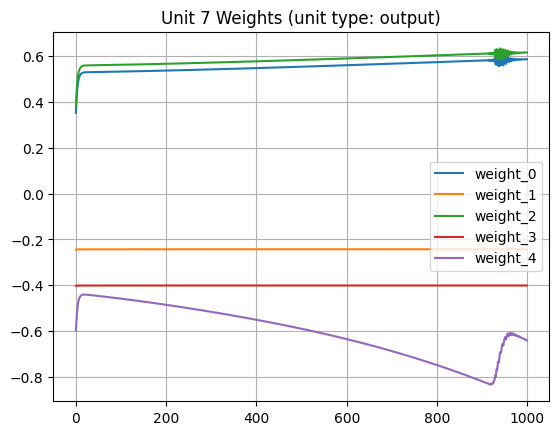

In [49]:
for unit_index in stats['units_weights'].keys():
    vals = np.array(stats['units_weights'][unit_index]).T
    multy_plot(vals, 
               ['weight_' + str(i) for i in range(len(vals))], 
               'Unit ' + str(unit_index) + ' Weights (unit type: ' + NN.neurons[unit_index].type + ')')

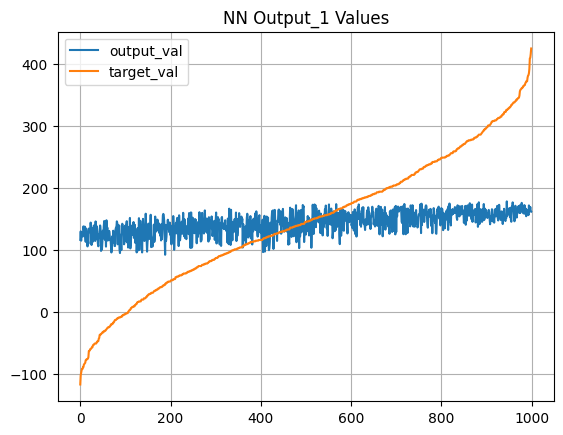

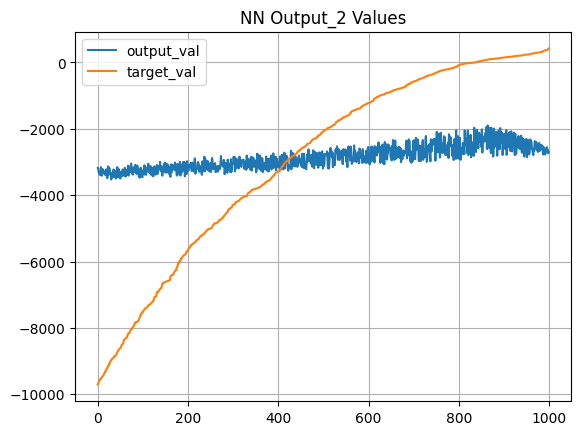

In [50]:
for i in range(tr_output):
    sorted_order = training_set[:, tr_input + i].argsort()
    multy_plot([predictions[sorted_order][:,i] , training_set[sorted_order][:,tr_input + i]], 
                ['output_val', 'target_val'], 
                'NN Output_' + str(i + 1) +  ' Values')

In [51]:
NN.predict(np.array([10,20,30]))

array([0.59337953, 0.56078858])

In [52]:
NN.predict(np.array([50,-20,1]))

array([0.59183403, 0.56235647])